# 🛍️ Segmentación de Clientes con Aprendizaje No Supervisado

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [3]:
df = pd.read_csv(r"C:\Users\boter\OneDrive\Documents\Noveno Semestre\Ciencia de datos II\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = df.rename(columns={
    'Annual Income (k$)': 'Ingreso_Anual',
    'Spending Score (1-100)': 'Puntuacion_Gasto',
    'Genre': 'Genero', 
    'Age' :'Edad'
})

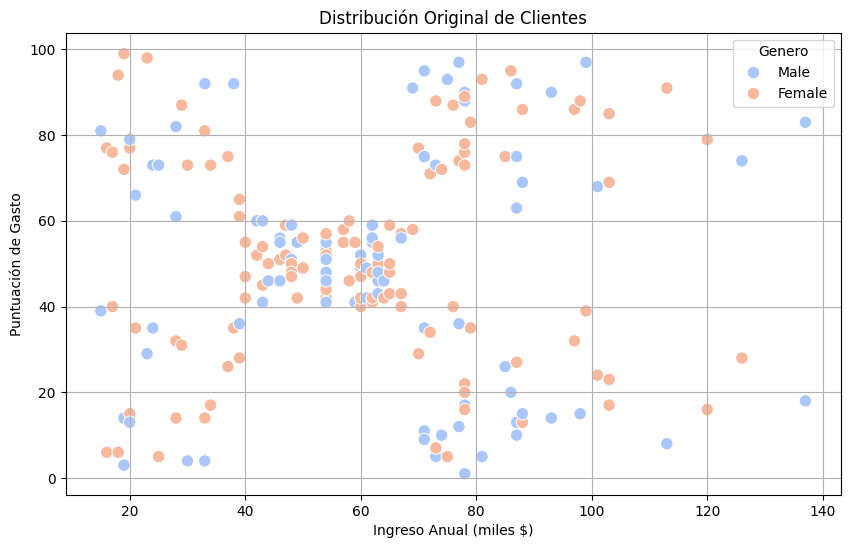

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Ingreso_Anual', y='Puntuacion_Gasto', 
                hue='Genero', palette='coolwarm', s=80)
plt.title('Distribución Original de Clientes')
plt.xlabel('Ingreso Anual (miles $)')
plt.ylabel('Puntuación de Gasto')
plt.grid(True)

In [6]:
#Revisando valores nulos
df.isnull().sum()

CustomerID          0
Genero              0
Edad                0
Ingreso_Anual       0
Puntuacion_Gasto    0
dtype: int64

### 🧐 Exploración Inicial

In [ ]:
df.describe()

,CustomerID,Edad,Ingreso_Anual,Puntuacion_Gasto
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


✅ Los clientes tienen en promedio 38 años

✅ El ingreso anual promedio es $60,560 USD 

✅ La puntuación de gasto varía ampliamente en  $25,82 USD 


✅ El género influye en los patrones de gasto: Las mujeres tienden a tener puntuaciones de gasto más altas que los hombres, especialmente en ingresos medios.

✅ No existe una relación fuerte entre edad e ingreso: Personas jóvenes y mayores pueden estar en todos los rangos de ingreso.

✅ La segmentación es necesaria: Hay patrones visuales (como la forma de X en Annual Income vs Spending Score) que indican que la población se puede dividir claramente en grupos o clusters.

✅ Picos de gasto concentrado: Se identifican grupos jóvenes con alto gasto y adultos con bajo gasto, útil para marketing dirigido.

✅ Diversidad de clientes: El mall tiene una base de clientes muy variada en términos de edad, ingreso y hábitos de consumo.x

In [8]:
#Eliminado Customer ID no es importante para el análisis
df = df.drop(columns=['CustomerID'])


In [9]:
df['Genero'] = df['Genero'].map({'Male': 0, 'Female': 1})

features = ['Genero', 'Edad', 'Ingreso_Anual', 'Puntuacion_Gasto']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


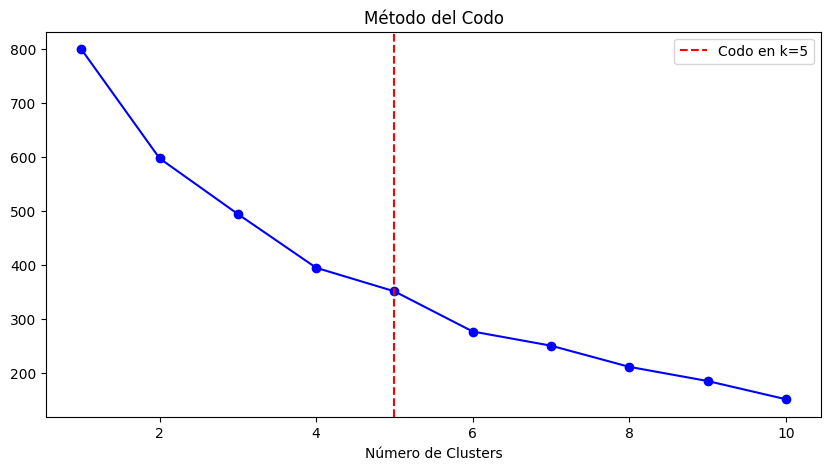

In [10]:
# Determinar número óptimo de clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,11), inertias, 'bo-')
plt.axvline(x=5, color='r', linestyle='--', label='Codo en k=5')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.legend()
plt.show()

✅ El "codo" sugiere el número óptimo de clusters.

### 🧹 Preprocesamiento

In [ ]:
# Seleccionar características
X = df[['Ingreso_Anual', 'Puntuacion_Gasto']]

# Estandarización 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con las dos componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Genero'] = df['Genero'].values  


### 👥 Aplicación de K-Means

In [26]:
#KMeans y etiquetas
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Añadir clusters al DataFrame
df['Cluster'] = clusters


### 🧪  Análisis visual de clusters

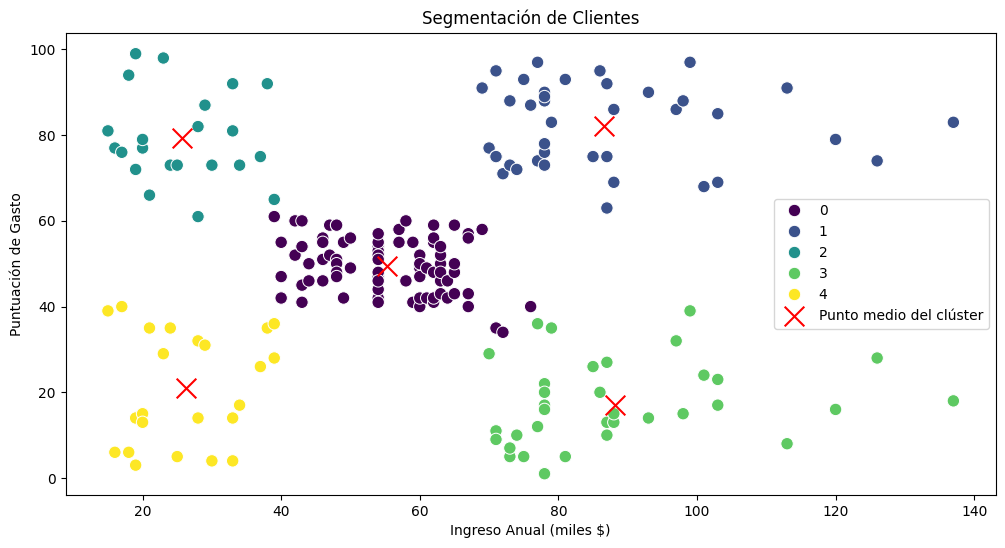

In [27]:
# Visualización 
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Ingreso_Anual', y='Puntuacion_Gasto', 
                hue='Cluster', palette='viridis', s=80)
plt.scatter(kmeans.cluster_centers_[:,0]*scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:,1]*scaler.scale_[1] + scaler.mean_[1],
            s=200, c='red', marker='x', label='Punto medio del clúster')
plt.title('Segmentación de Clientes')
plt.xlabel('Ingreso Anual (miles $)')
plt.ylabel('Puntuación de Gasto')
plt.legend()
plt.show()

### 📌 Validación

In [28]:
score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {score:.2f}')


Silhouette Score: 0.55


📋 Con un Silhouette Score de 0.55 es válido y confiable para segmentación, los grupos son consistentes y podrían usarse para tomar decisiones, como campañas de marketing diferenciadas o diseño de productos por perfil.

In [23]:
df.groupby('Cluster')[['Edad', 'Ingreso_Anual', 'Puntuacion_Gasto']].mean()


,Edad,Ingreso_Anual,Puntuacion_Gasto
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


✅ Cluster 0: "Adultos de ingreso medio y gasto moderado"

Edad media: ~43 años.

Ingreso medio: ~$55K.

Puntuación de gasto: ~50 (nivel medio).

Perfil: Clientes maduros con ingreso medio y hábitos de gasto balanceados. 

✅ Cluster 1: "Jóvenes con ingresos altos y muy gastadores"

Edad media: ~33 años.

Ingreso medio: ~$86K.

Puntuación de gasto: ~82 (alto).

Perfil: Jóvenes adinerados que gastan mucho. Muy atractivos para estrategias de marketing premium.

✅ Cluster 2: "Jóvenes con bajos ingresos pero muy gastadores"

Edad media: ~25 años.

Ingreso medio: ~$26K.

Puntuación de gasto: ~79 (alto).

Perfil: Segmento joven con bajo poder adquisitivo pero que gasta mucho. Pueden ser sensibles a promociones.

✅ Cluster 3: "Adultos con ingresos altos pero poco gasto"

Edad media: ~41 años.

Ingreso medio: ~$88K.

Puntuación de gasto: ~17 (muy bajo).

Perfil: Personas con poder adquisitivo pero poco interés en gastar. Tal vez conservadores o poco receptivos al marketing.

✅ Cluster 4: "Mayores con bajos ingresos y bajo gasto"

Edad media: ~45 años.

Ingreso medio: ~$26K.

Puntuación de gasto: ~21.

Perfil: Segmento de clientes mayores, con poca capacidad y disposición de gasto. Baja prioridad comercial.

C:\Users\boter\AppData\Local\Temp\ipykernel_13684\1943089848.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='viridis')


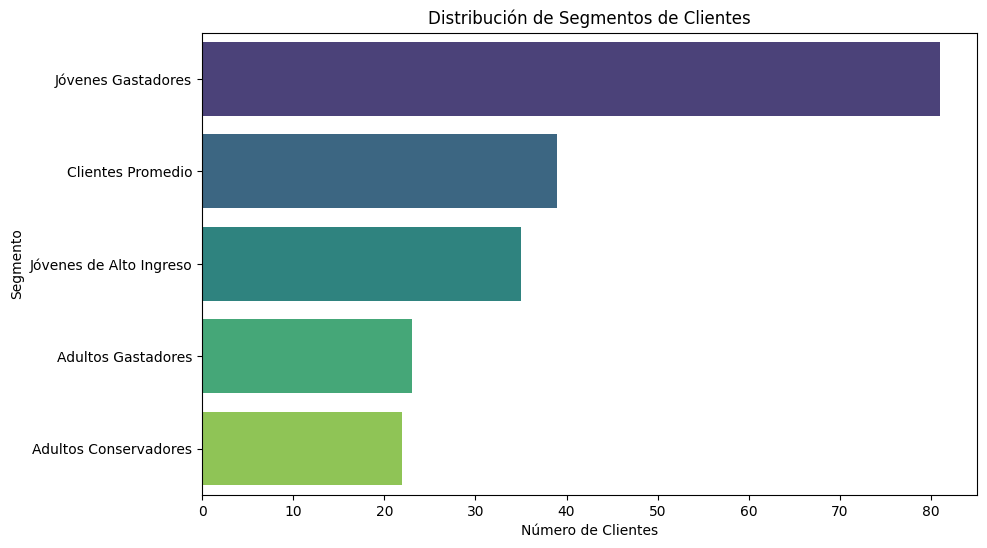

In [24]:
cluster_names = {
    0: 'Jóvenes Gastadores',
    1: 'Clientes Promedio',
    2: 'Adultos Conservadores',
    3: 'Jóvenes de Alto Ingreso',
    4: 'Adultos Gastadores'
}

df['Segmento'] = df['Cluster'].map(cluster_names)

# Visualización final
segment_counts = df['Segmento'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='viridis')
plt.title('Distribución de Segmentos de Clientes')
plt.xlabel('Número de Clientes')
plt.ylabel('Segmento')
plt.show()

📉Los jóvenes (especialmente los "Gastadores") dominan la base de clientes, lo que sugiere una estrategia comercial enfocada en este segmento.

📉Los Clientes Promedio representan una porción significativa, indicando un mercado equilibrado.

📉Los segmentos de alto ingreso y adultos son menores, lo que podría señalar oportunidades para campañas dirigidas a estos grupos.

### 🔚 Conclusión general
Este proyecto se centró en analizar y segmentar clientes de un centro comercial usando técnicas de análisis exploratorio de datos (EDA), reducción de dimensionalidad (PCA) y clustering (K-Means). A partir de los datos de género, edad, ingreso anual y puntuación de gasto, se obtuvo una visión clara del comportamiento de los consumidores.
🔍 Principales hallazgos:
EDA inicial: No se observaron correlaciones lineales fuertes entre variables.

Las distribuciones de edad, ingreso y puntuación de gasto varían ligeramente entre géneros.

PCA: La visualización de PCA permitió ver que los clientes forman grupos diferenciados, aunque no completamente separados por género.

Segmentación K-Means: Se determinaron 5 clústeres óptimos con un Silhouette Score de 0.55, lo que indica una buena calidad de agrupamiento.

Cada clúster representa un perfil de cliente distinto. Por ejemplo:

Clúster 1: Jóvenes con alto ingreso y alta puntuación de gasto.

Clúster 3: Adultos con ingreso alto pero bajo nivel de gasto.

Clúster 2: Jóvenes con bajo ingreso pero alta propensión a gastar.

Finalmente: Estos segmentos pueden ser aprovechados por el área de marketing para ofrecer campañas más personalizadas y eficaces.
